In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

from scipy.io.wavfile import read
from scipy.signal import butter, lfilter, freqz

from mpl_toolkits.mplot3d import Axes3D

from scipy.fftpack import fft

%matplotlib inline

In [2]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

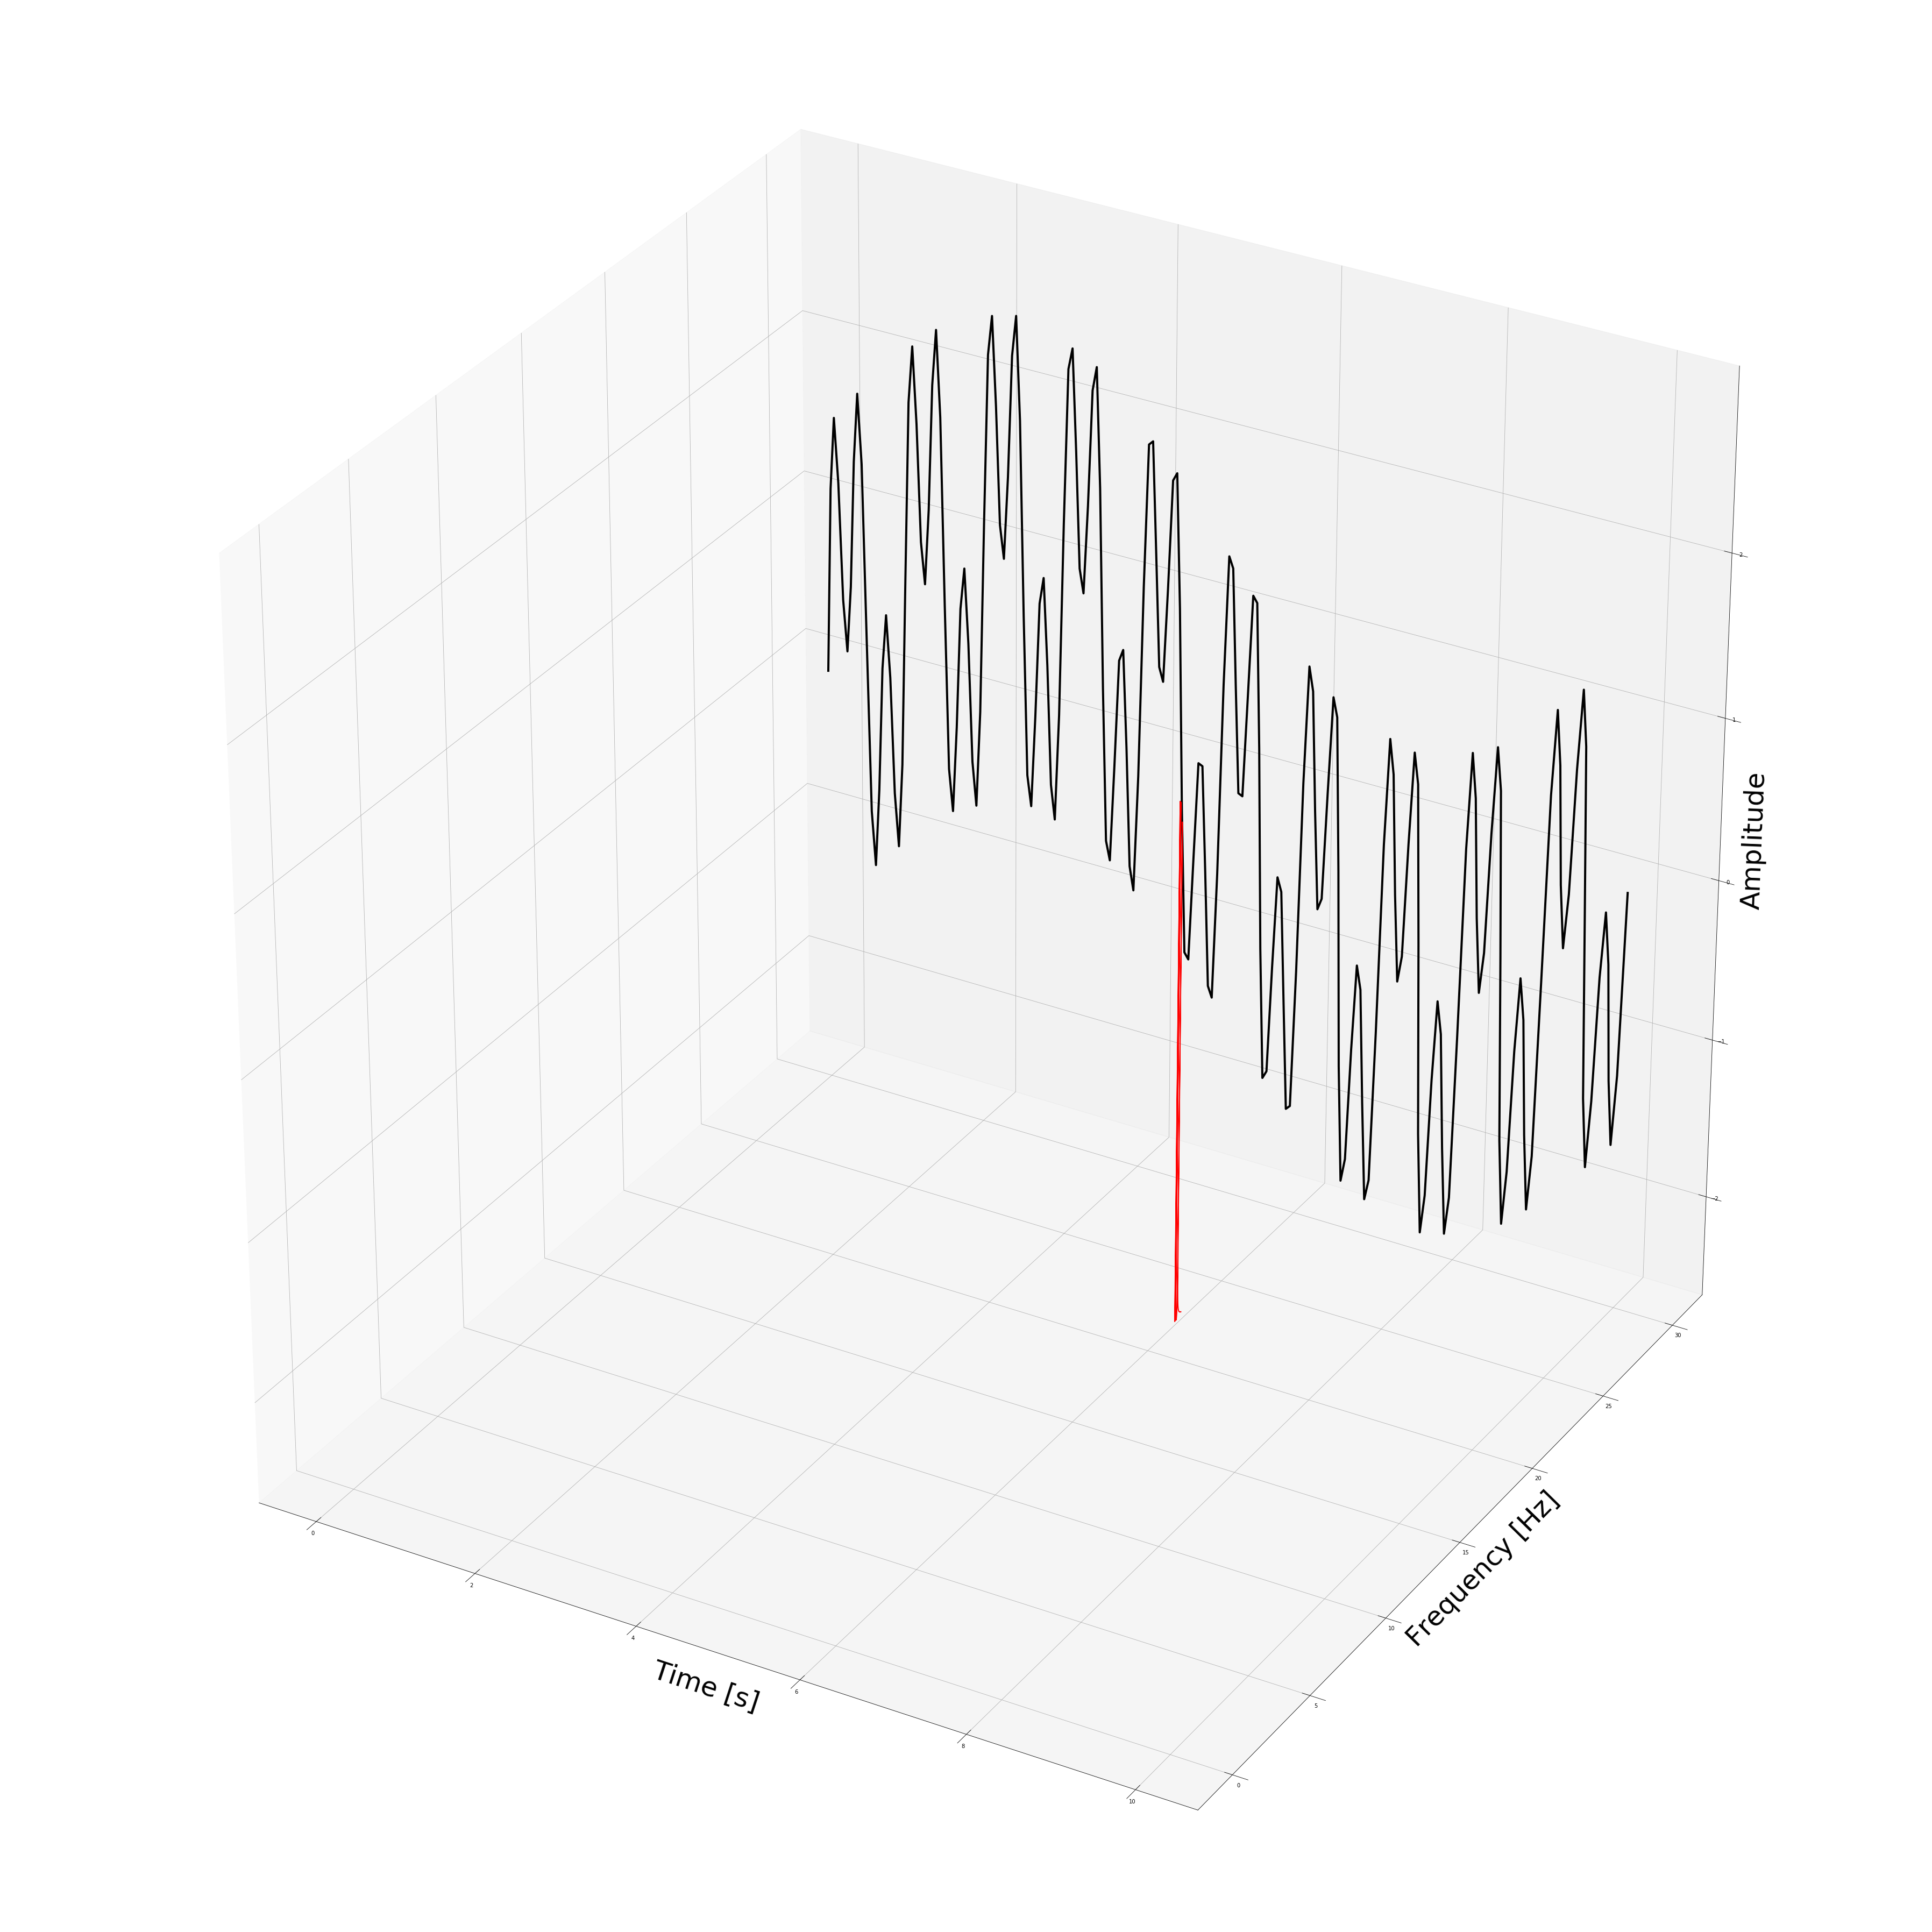

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

IndexError: list index out of range

In [58]:
t_n = 200
N = 200 #sample rate (in Hz) must equal last of x=np.linspace(0,10,300) below
T = t_n / N
f_s = 1/T #freq

x_value = np.linspace(0,t_n,N)

#dummy values
amplitudes = [1, 1, 1]
frequencies = [30, 10, 1]

y_values = [amplitudes[i]*np.sin(2*np.pi*frequencies[i]*x_value) for i in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)

colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


# display
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=50)
ax.set_ylabel("\nFrequency [Hz]", fontsize=50)
ax.set_zlabel("\nAmplitude", fontsize=50)

y_values_ = [composite_y_value] + list(reversed(y_values))

for i in range(0,len(y_values_)):
    signal = y_values_[i]
    color = colors[i]
    length = signal.shape[0]
    x=np.linspace(0,10,200)
    y=np.array([frequencies[i]]*length)
    z=signal

    if i == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(list(x), list(y), zs=list(z), linewidth=linewidth, color=color)

    x=[10]*75
    y=f_values[:75]
    z = fft_values[:75]*3
    ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='red')
    
    plt.tight_layout()
    plt.show()




In [ ]:
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()